# E commerce - Project
> Data Pipelines

This will serve as the main notebook for all the executions, first we'll retrieve data from various sources, load it in our local data warehouse, and subsequently perform transformations to plot visualizations with the resulting information.


In [2]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path
from scipy import stats

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [3]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Extract the information from different sources.
> 1. holidays from public API
> 2. load data from csv databases

In [4]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Store everything into our Data Warehouse.

![Data schema](images/data_schema.png)

In [5]:
load(data_frames=csv_dataframes, database=ENGINE)

### 3. Transform

Transform the different queries into tables. 

##### 3.1 Revenue queries

In [6]:
# store all the query results in a Dict
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

c:\Users\user\Desktop\AnyoneAI\SPR01\src\transform.py:244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dates["order_purchase_timestamp"] = filtered_dates[


In [7]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,Jan,NaN,37632.57,969967.80
1,02,Feb,NaN,222270.75,853616.82
2,03,Mar,NaN,376833.72,1024851.95
3,04,Apr,NaN,299798.45,1274742.18
4,05,May,NaN,579280.43,1150528.93
5,06,Jun,NaN,489463.42,1141543.85
6,07,Jul,NaN,518115.19,925958.79
7,08,Aug,NaN,609180.34,1319737.66
8,09,Sep,NaN,652576.48,12875.18
9,10,Oct,34116.28,740570.40,347.95


In [8]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,bed_bath_table,9272,1692714.28
1,health_beauty,8646,1620684.04
2,computers_accessories,6529,1549252.47
3,furniture_decor,6307,1394466.93
4,watches_gifts,5493,1387046.31
5,sports_leisure,7529,1349252.93
6,housewares,5743,1069787.97
7,auto,3809,833610.84
8,garden_tools,3448,810614.93
9,cool_stuff,3559,744649.32


In [9]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,324.51
1,fashion_childrens_clothes,7,718.98
2,cds_dvds_musicals,12,1199.43
3,home_comfort_2,24,1710.54
4,flowers,29,2213.01
5,arts_and_craftmanship,23,2326.17
6,la_cuisine,13,2913.53
7,fashion_sport,26,3605.83
8,diapers_and_hygiene,25,4126.17
9,fashio_female_clothing,36,4902.67


In [10]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Delivery queries

In [11]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,State,Delivery_Difference
0,AL,8
1,MA,9
2,BA,10
3,CE,10
4,ES,10
5,SE,10
6,MS,11
7,PI,11
8,RJ,11
9,SC,11


In [12]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[
    QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value
]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,12.647044,14.080563,NaN,39.508831,26.302555
1,02,Feb,NaN,13.168825,16.945138,NaN,31.848929,24.528996
2,03,Mar,NaN,12.951184,16.301410,NaN,24.732386,22.033067
3,04,Apr,NaN,14.917913,11.499241,NaN,27.349810,23.679546
4,05,May,NaN,11.322363,11.419029,NaN,24.284784,22.891488
5,06,Jun,NaN,12.011573,9.239216,NaN,24.021864,27.772740
6,07,Jul,NaN,11.592732,8.958636,NaN,23.317316,19.690127
7,08,Aug,NaN,11.147125,7.732780,NaN,23.480603,15.186330
8,09,Sep,54.813194,11.851007,NaN,18.488449,22.437366,NaN
9,10,Oct,19.600559,11.856700,NaN,55.676632,23.019536,NaN


In [13]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Ammount
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


In [14]:
# Bringing the information from this data transformation
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,order_count,date,holiday
0,32,2017-01-05,False
1,4,2017-01-06,False
2,4,2017-01-07,False
3,6,2017-01-08,False
4,5,2017-01-09,False
...,...,...,...
356,167,2017-12-27,False
357,146,2017-12-28,False
358,135,2017-12-29,False
359,97,2017-12-30,False


In [15]:
# Storing the table of freight value
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Plotting the query tables

Now, we will create plots from the different queries

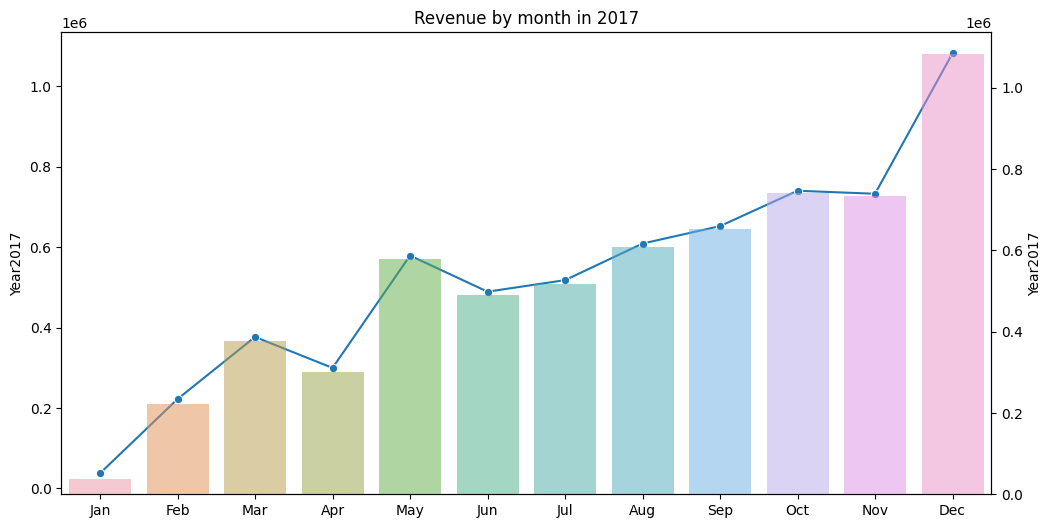

In [16]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

The tendency here is very clear, while the time passes the revenue is increasing as well.

In [17]:
plot_top_10_revenue_categories(top_10_revenue_categories)

The categories: bed_bath_table and health_beauty are inquestionably the most important categories in terms of profit, which tell us that as an E-commerce we should expand the offer of these, regardless the others.

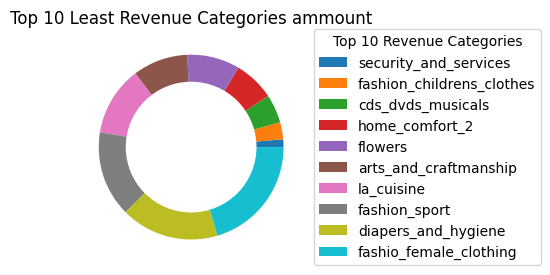

In [18]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [19]:
plot_revenue_per_state(revenue_per_state)

Sao Paulo, Rio de Janeiro and Minas Gerais. are the states with the most revenue, accordingly with their respective sizes and populations.

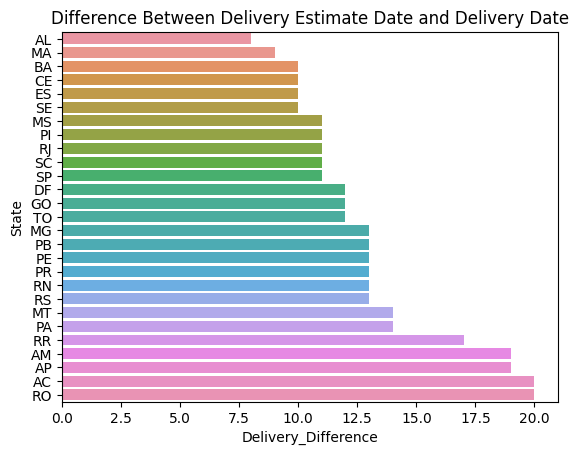

In [20]:
plot_delivery_date_difference(delivery_date_difference)

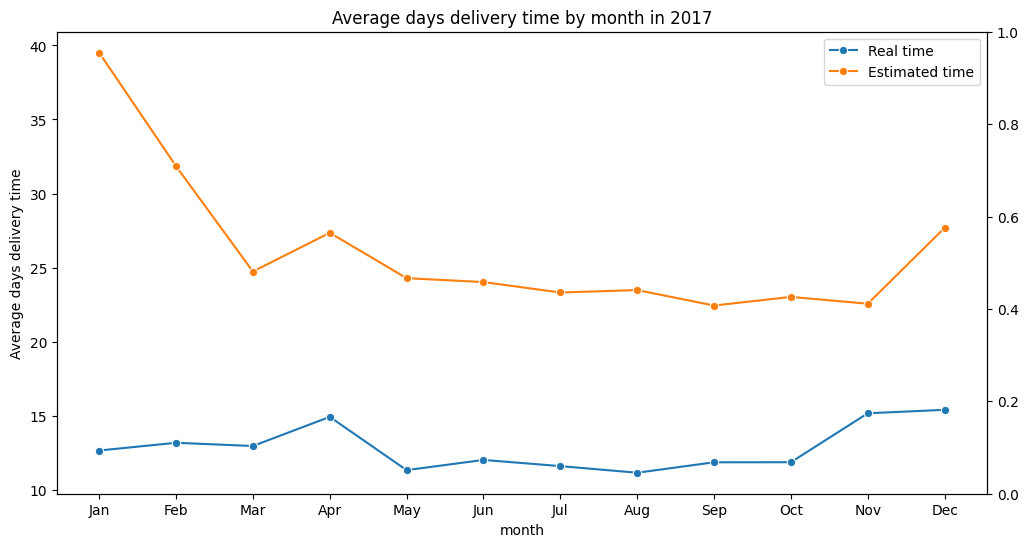

In [21]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

The deliveries are arriving much faster than expected, which could be good because there are no delays, but it could be almost unpredictable for the customer when the item is coming to their home.

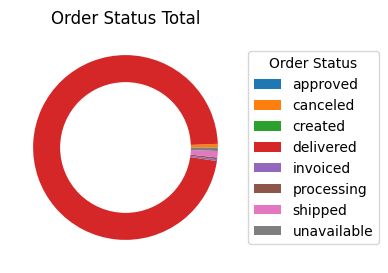

In [22]:
plot_global_amount_order_status(global_ammount_order_status)

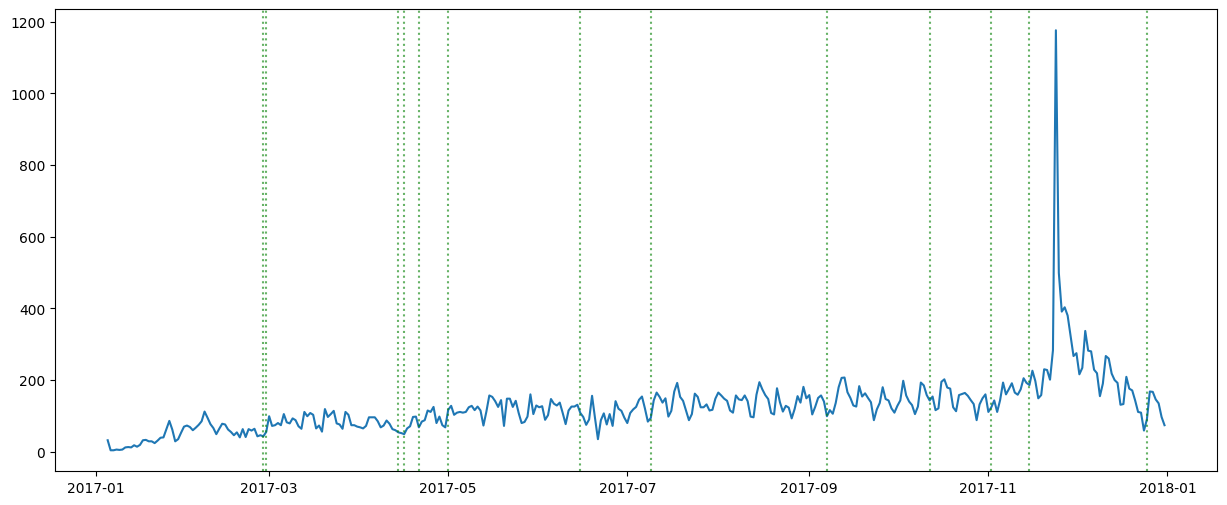

In [23]:
plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)

There is a pattern in the number of orders related to holidays, in almost all the cases there is an increase of orders when its holiday or the days later, but it's not very clear and as scientist we are, we shouldn't trust just in these visuals, let's make a test

Point biserial correlation coefficient: is used to check the correlation between a continuos variable and a boolean series, let's apply to our data to see if there is any correlation

In [24]:
df = orders_per_day_and_holidays
correlation, p_value = stats.pointbiserialr(df["holiday"], df["order_count"])
print(f"Point biserial correlation coefficient: {correlation} \npvalue: {p_value}")

Point biserial correlation coefficient: -0.06990978077713429 
pvalue: 0.1850712833340866


The point-biserial correlation coefficient is approximately -0.0699, indicating a very weak or negligible correlation between the holiday variable and the order_count variable. The p-value is approximately 0.1851, which is greater than the common significance threshold of 0.05. Therefore, the observed correlation is not statistically significant, suggesting that the presence or absence of holidays doesn't have a substantial impact on the number of orders.

in other words, there is no strong evidence of the correlation between holidays and the number of orders according to the test.

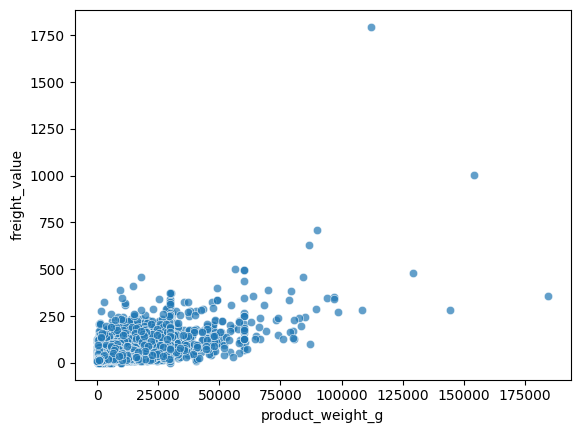

In [25]:
plot_freight_value_weight_relationship(freight_value_weight_relationship)

In [33]:
freight_value_weight_relationship.corr(numeric_only=True)

,freight_value,product_weight_g
freight_value,1.000000,0.640093
product_weight_g,0.640093,1.000000


based on the correlation test, there's a moderate correlation between the variables freight_value and product_weight_g, when the weight increases the value does it as well but no strongly, indicating that may be other factors influencing freight costs as well

In [28]:
freight_value_weight_relationship.describe().T

,count,mean,std,min,25%,50%,75%,max
freight_value,96478.0,22.785253,21.559197,0.0,13.85,17.17,24.0175,1794.96
product_weight_g,96478.0,2386.439924,4769.669672,0.0,300.00,750.00,2050.0000,184400.00


In the product weight we can see that the mean is very different for the median, that could be potentially a skewed distribution or presence of outliers, after making the experiments, the removal of outliers doesn't improve the correlation nor gives a better scatter plot. therefore we can conclude that there exists a moderate correlation between the variables, but no other significant insight emerged from the analysis.